<a href="https://colab.research.google.com/github/Lohithvennapureddy/PRODIGY_ML_03/blob/main/Copy_of_Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Upload your Kaggle API key (kaggle.json)
from google.colab import files
files.upload()  # upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lohithvennapureddy","key":"328e4320f9f4925d61df5f69986a661a"}'}

In [ ]:
# Make directory for Kaggle and move the key
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Dogs vs Cats dataset
!kaggle competitions download -c dogs-vs-cats

# Unzip the dataset
!unzip -q dogs-vs-cats.zip -d /content/dogs-vs-cats
!unzip -q /content/dogs-vs-cats/train.zip -d /content/dogs-vs-cats/train
!unzip -q /content/dogs-vs-cats/test1.zip -d /content/dogs-vs-cats/test1



mv: cannot stat 'kaggle.json': No such file or directory
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/dogs-vs-cats/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/dogs-vs-cats/train/train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Define paths
DATADIR = "/content/dogs-vs-cats/train/train"
CATEGORIES = ["cat", "dog"]

IMG_SIZE = 64
data = []
labels = []

# Load and preprocess images
for category in CATEGORIES:
    path = DATADIR
    class_num = CATEGORIES.index(category)

    for img in tqdm(os.listdir(path)[:4000]):  # using first 4000 images for speed
        try:
            if category in img:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                img_array = img_array / 255.0  # normalize
                data.append(img_array.flatten())
                labels.append(class_num)
        except Exception as e:
            pass

print("✅ Data Loaded Successfully!")
print(f"Total samples: {len(data)}")



100%|██████████| 4000/4000 [00:01<00:00, 2721.16it/s]

✅ Data Loaded Successfully!
Total samples: 4000


In [ ]:
# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=10, gamma=0.001)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Model Accuracy: 61.12%

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.60      0.62       430
           1       0.57      0.62      0.60       370

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm_pca = SVC(kernel='rbf', C=10, gamma=0.001)
svm_pca.fit(X_train_pca, y_train)

y_pred_pca = svm_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"⚡ PCA + SVM Accuracy: {acc_pca*100:.2f}%")


⚡ PCA + SVM Accuracy: 61.25%


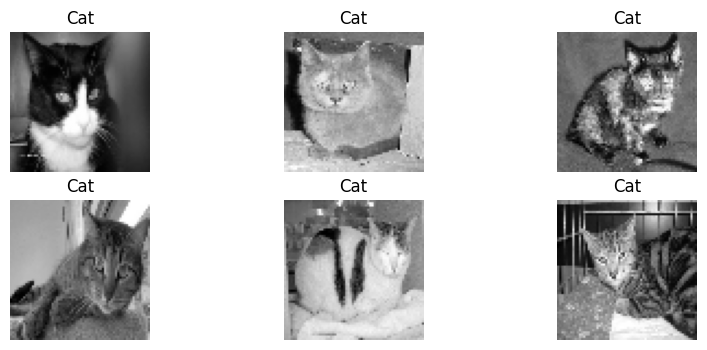

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title("Cat" if y[i]==0 else "Dog")
    plt.axis('off')
plt.show()
